In [1]:
## Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the data**

In [2]:
df=pd.read_csv("/content/HousePricePrediction.xlsx - Sheet1.csv")

**Exploratory Data Analysis**

Taking a look at the first 5 rows of the dataset

In [3]:
df.head() 

,Id,MSSubClass,MSZoning,LotArea,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


Taking a look at the last 5 rows of the dataset

In [4]:
df.tail()

,Id,MSSubClass,MSZoning,LotArea,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,2914,160,RM,1936,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,2918,60,RL,9627,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


Learning the dtypes of columns

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   BldgType      2919 non-null   object 
 5   OverallCond   2919 non-null   int64  
 6   YearBuilt     2919 non-null   int64  
 7   YearRemodAdd  2919 non-null   int64  
 8   Exterior1st   2918 non-null   object 
 9   BsmtFinSF2    2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 273.8+ KB


Checking the shape of data

In [6]:
df.shape

(2919, 12)

Checking for the missing values

In [7]:
df.isnull().sum() 

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

Getting the statistical summary of dataset

In [8]:
df.describe() 

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


Identifying exact number of data types

In [9]:

obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 3
Integer variables: 6
Float variables: 3


<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

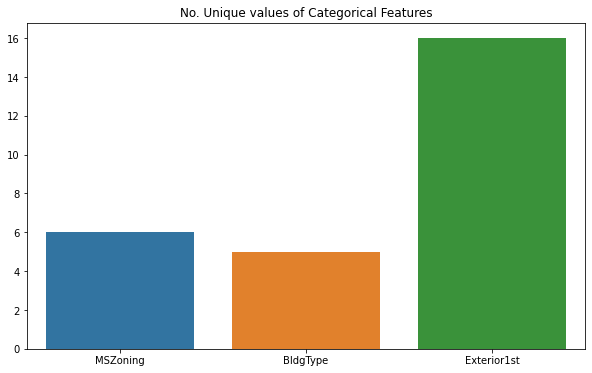

In [10]:

unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
sns.barplot(x=object_cols,y=unique_values)

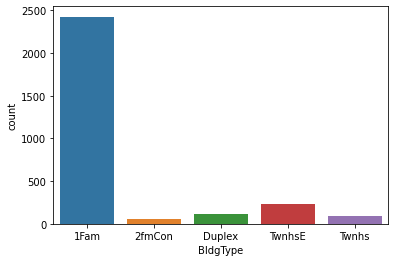

In [11]:
sns.countplot(x ='BldgType', data = df)
 
# Show the plot
plt.show()

In [12]:
## droping the column
df.drop(['Id'],
             axis=1,
             inplace=True)

In [13]:
df.head()

,MSSubClass,MSZoning,LotArea,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


**Preprocessing**

**Filling Null Values**

In [14]:

df['SalePrice'] = df['SalePrice'].fillna(
  df['SalePrice'].mean())
df.isnull().sum()

MSSubClass      0
MSZoning        4
LotArea         0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [15]:
## Droping Null Values
df1 = df.dropna() 
df1.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

**Convertions**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   int64  
 1   MSZoning      2915 non-null   object 
 2   LotArea       2919 non-null   int64  
 3   BldgType      2919 non-null   object 
 4   OverallCond   2919 non-null   int64  
 5   YearBuilt     2919 non-null   int64  
 6   YearRemodAdd  2919 non-null   int64  
 7   Exterior1st   2918 non-null   object 
 8   BsmtFinSF2    2918 non-null   float64
 9   TotalBsmtSF   2918 non-null   float64
 10  SalePrice     2919 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 251.0+ KB


In [17]:
df_dum=pd.get_dummies(df[['MSZoning','BldgType','Exterior1st']])

In [18]:
df_dum.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
## Combining Dataframes
df_new=pd.concat([df,df_dum],axis=1)
df_new

,MSSubClass,MSZoning,LotArea,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,8450,1Fam,5,2003,2003,VinylSd,0.0,856.0,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,9600,1Fam,8,1976,1976,MetalSd,0.0,1262.0,...,0,0,0,1,0,0,0,0,0,0
2,60,RL,11250,1Fam,5,2001,2002,VinylSd,0.0,920.0,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,9550,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,14260,1Fam,5,2000,2000,VinylSd,0.0,1145.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Twnhs,7,1970,1970,CemntBd,0.0,546.0,...,1,0,0,0,0,0,0,0,0,0
2915,160,RM,1894,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,...,1,0,0,0,0,0,0,0,0,0
2916,20,RL,20000,1Fam,7,1960,1996,VinylSd,0.0,1224.0,...,0,0,0,0,0,0,0,1,0,0
2917,85,RL,10441,1Fam,5,1992,1992,HdBoard,0.0,912.0,...,0,1,0,0,0,0,0,0,0,0


In [20]:
## Droping multiple columns
df_new=df_new.drop(['MSZoning','BldgType','Exterior1st'],axis=1)

In [21]:
df_new.isnull().sum()

MSSubClass             0
LotArea                0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
BsmtFinSF2             1
TotalBsmtSF            1
SalePrice              0
MSZoning_C (all)       0
MSZoning_FV            0
MSZoning_RH            0
MSZoning_RL            0
MSZoning_RM            0
BldgType_1Fam          0
BldgType_2fmCon        0
BldgType_Duplex        0
BldgType_Twnhs         0
BldgType_TwnhsE        0
Exterior1st_AsbShng    0
Exterior1st_AsphShn    0
Exterior1st_BrkComm    0
Exterior1st_BrkFace    0
Exterior1st_CBlock     0
Exterior1st_CemntBd    0
Exterior1st_HdBoard    0
Exterior1st_ImStucc    0
Exterior1st_MetalSd    0
Exterior1st_Plywood    0
Exterior1st_Stone      0
Exterior1st_Stucco     0
Exterior1st_VinylSd    0
Exterior1st_Wd Sdng    0
Exterior1st_WdShing    0
dtype: int64

In [22]:
## Droping Null Values
df2 = df_new.dropna()
df2.isnull().sum()

MSSubClass             0
LotArea                0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
BsmtFinSF2             0
TotalBsmtSF            0
SalePrice              0
MSZoning_C (all)       0
MSZoning_FV            0
MSZoning_RH            0
MSZoning_RL            0
MSZoning_RM            0
BldgType_1Fam          0
BldgType_2fmCon        0
BldgType_Duplex        0
BldgType_Twnhs         0
BldgType_TwnhsE        0
Exterior1st_AsbShng    0
Exterior1st_AsphShn    0
Exterior1st_BrkComm    0
Exterior1st_BrkFace    0
Exterior1st_CBlock     0
Exterior1st_CemntBd    0
Exterior1st_HdBoard    0
Exterior1st_ImStucc    0
Exterior1st_MetalSd    0
Exterior1st_Plywood    0
Exterior1st_Stone      0
Exterior1st_Stucco     0
Exterior1st_VinylSd    0
Exterior1st_Wd Sdng    0
Exterior1st_WdShing    0
dtype: int64

In [23]:
## Dividing Independent and Dependent Variables
x=df_new.drop('SalePrice',axis=1)
y=df_new['SalePrice']

In [24]:
print(x.shape)
x.head()


(2919, 32)


,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20,9600,8,1976,1976,0.0,1262.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,60,11250,5,2001,2002,0.0,920.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,70,9550,5,1915,1970,0.0,756.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,60,14260,5,2000,2000,0.0,1145.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
print(y.shape)
y.head()

(2919,)


0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

**Train & Test Split**

In [26]:
import random

def train_test_split(x, y, test_size=0.2, random_state=42):
    """
    Splits the data into training and testing sets.
    """
  if random_state:
    random.seed(random_state)

## Taking random sample
  n_samples = x.shape[0]
  n_test=int(n_samples*test_size)
  test_indices=random.sample(range(n_samples),n_test)
  train_indices=list(set(range(n_samples))-set(test_indices))

  x_train=x[train_indices]
  y_train=y[train_indices]
  x_test=x[test_indices]
  y_test=y[test_indices]

  return x_train, x_test, y_train, y_test


In [27]:
def prepare_data(x,y,split_size=0.3):
  x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=split_size)